In [44]:
import numpy as np
import pandas as pd


df = pd.read_csv(r'C:\Users\majal\Downloads\archive (3)\heart.csv')
df.dropna(inplace=True)

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


<h6>Notebook: https://www.kaggle.com/code/joeferndz/heart-analysis-knn-vs-logistic-regression-jf</h6>
<h6> Database: https://www.kaggle.com/code/joeferndz/heart-analysis-knn-vs-logistic-regression-jf/notebook</h6>

In [45]:
df.shape

(1025, 14)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [47]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [49]:
df=df.rename(
    columns={
        'cp':'chest_pain',
        'trestbps':'resting_blood_pressure', 
        'chol': 'cholesterol',
        'fbs': 'fasting_blood_sugar',
        'restecg' : 'resting_electrocardiogram', 
        'thalach': 'max_heart_rate_achieved', 
        'exang': 'exercise_induced_angina',
        'oldpeak': 'st_depression', 
        'slope': 'st_slope', 
        'ca':'num_major_vessels', 
        'thal': 'thalassemia'}
)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        1025 non-null   int64  
 1   sex                        1025 non-null   int64  
 2   chest_pain                 1025 non-null   int64  
 3   resting_blood_pressure     1025 non-null   int64  
 4   cholesterol                1025 non-null   int64  
 5   fasting_blood_sugar        1025 non-null   int64  
 6   resting_electrocardiogram  1025 non-null   int64  
 7   max_heart_rate_achieved    1025 non-null   int64  
 8   exercise_induced_angina    1025 non-null   int64  
 9   st_depression              1025 non-null   float64
 10  st_slope                   1025 non-null   int64  
 11  num_major_vessels          1025 non-null   int64  
 12  thalassemia                1025 non-null   int64  
 13  target                     1025 non-null   int64

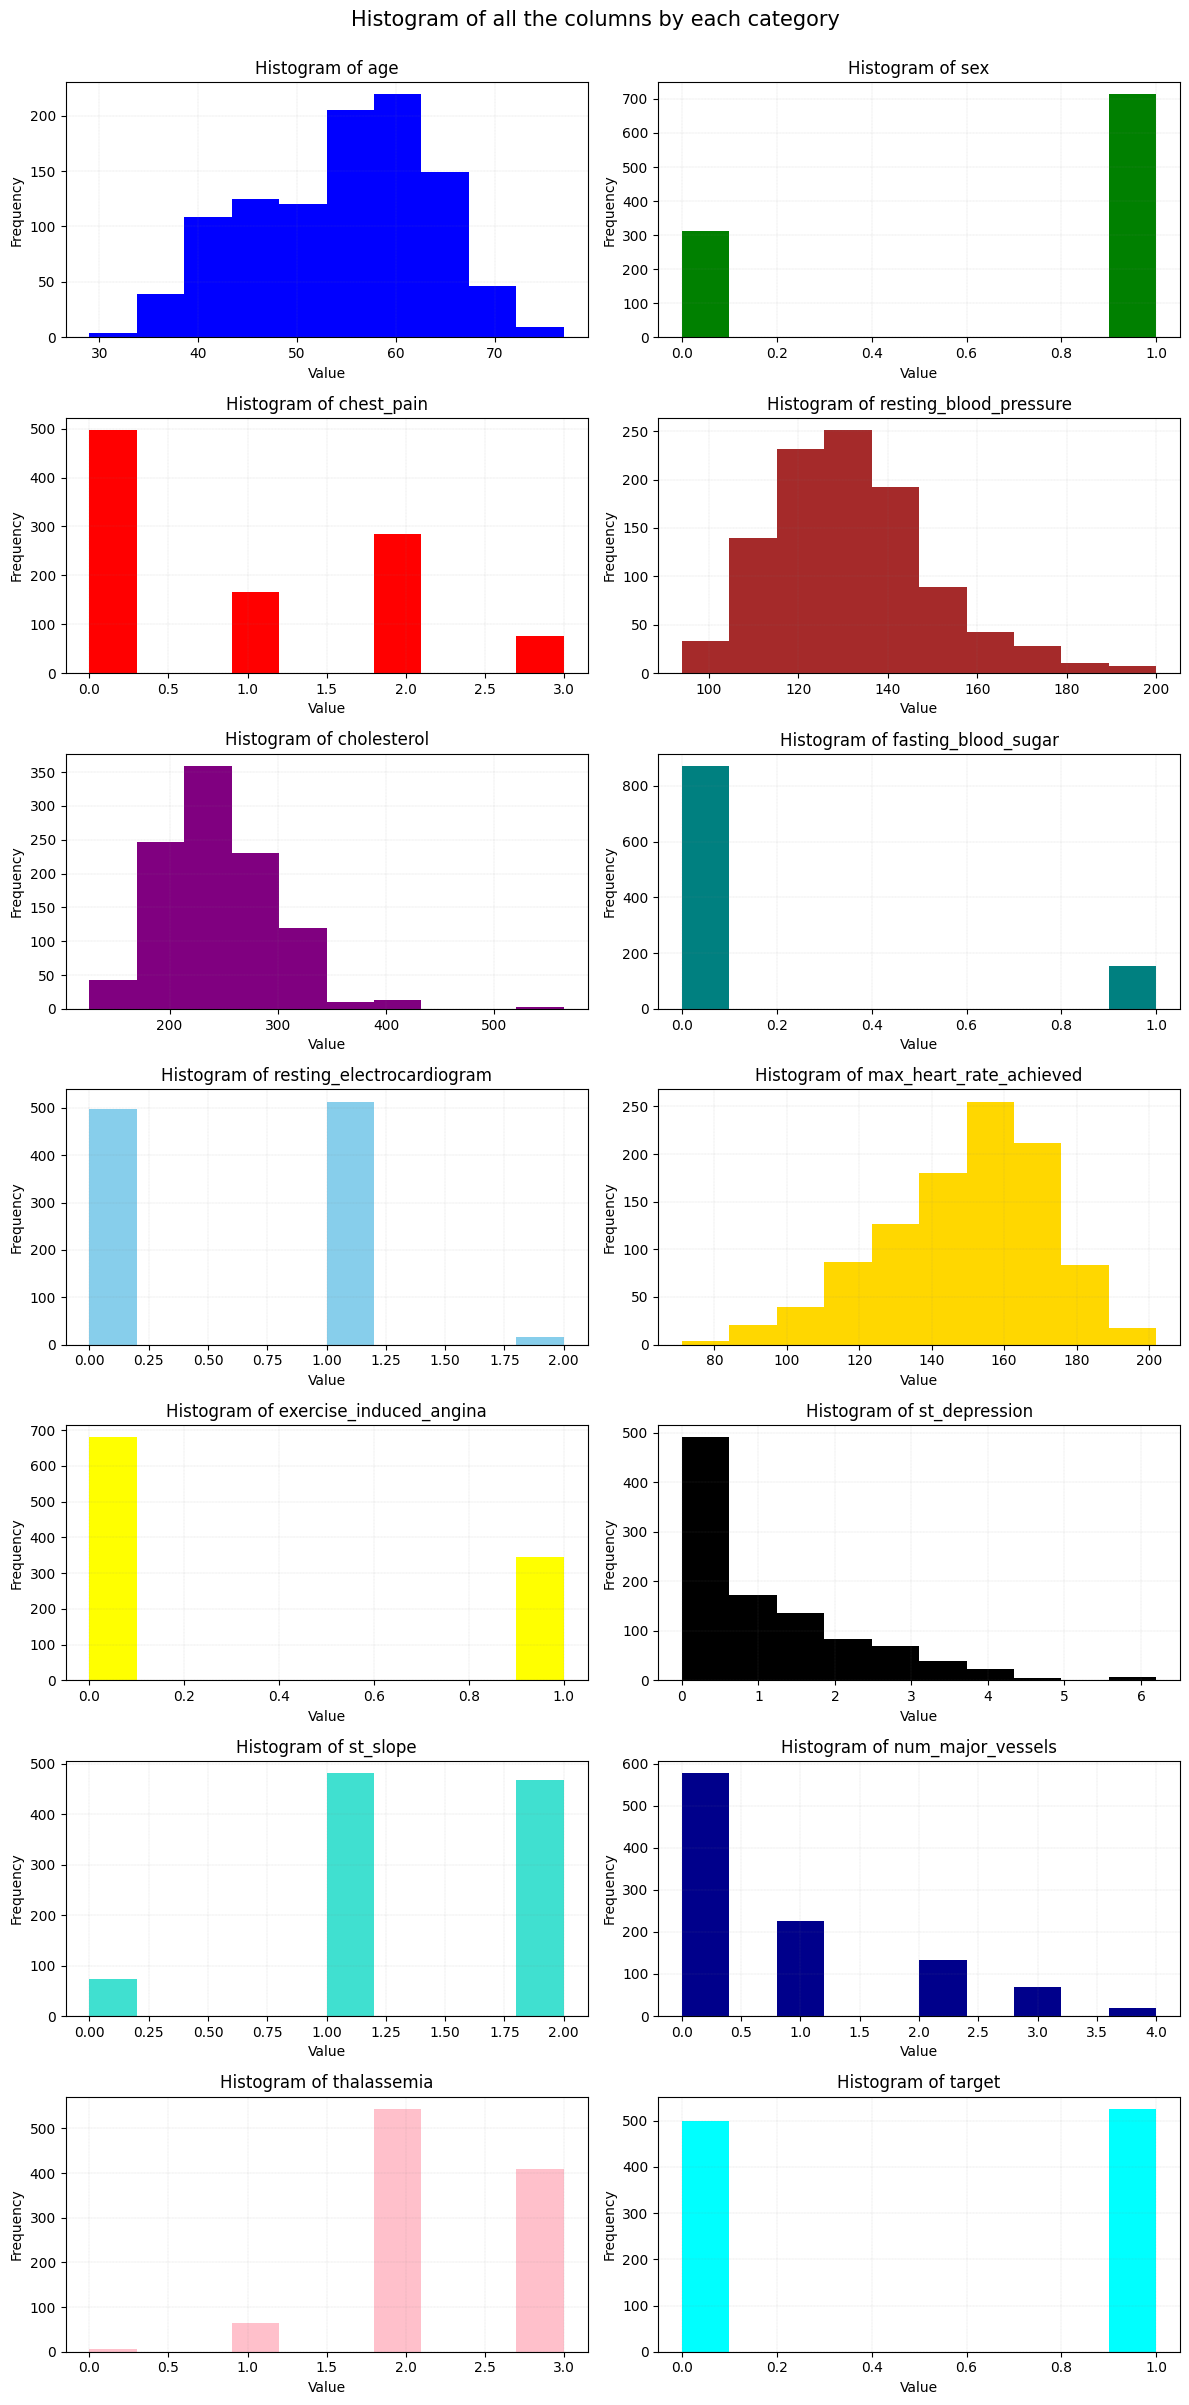

In [51]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (12, 24))


colors = ['blue', 'green',  'red',  'brown', 'purple', 'teal', 'skyblue', 
          'gold', 'yellow', 'black','turquoise', 'darkblue', 'pink', 'aqua']


for i, col in enumerate(df.columns):
    r,c = int(i/2),int(i%2)
    axes[r,c].hist(df[col], color=colors[i])
    axes[r,c].set_title(f'Histogram of {col}')
    axes[r,c].set_xlabel('Value')
    axes[r,c].set_ylabel('Frequency')
    axes[r,c].grid(True, color = "grey", linewidth = "0.1", linestyle = "-.")

plt.suptitle('Histogram of all the columns by each category',fontsize=(15),y=1)
plt.tight_layout()
plt.show()

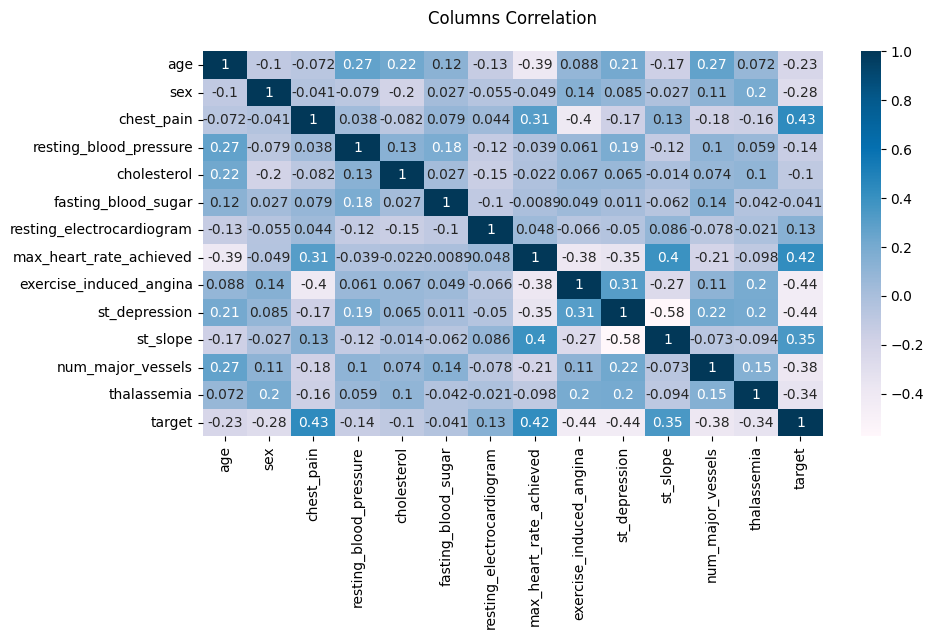

In [52]:
import seaborn as sns

plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='PuBu')
plt.title('Columns Correlation',y=1.05)
plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.preprocessing import LabelEncoder


In [54]:
X = df.copy()
X.drop(columns=['target'],inplace=True)
y = df['target']
X.columns



Index(['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')

<h3>KNN</h3>

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
knn_predict = knn_model.predict(X_test)
knn_predict

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [58]:
knn_proba = knn_model.predict_proba(X_test)
knn_proba[:5]

array([[0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4]])

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_curve, f1_score, auc

In [60]:
conf_matrix = confusion_matrix(y_test, knn_predict)

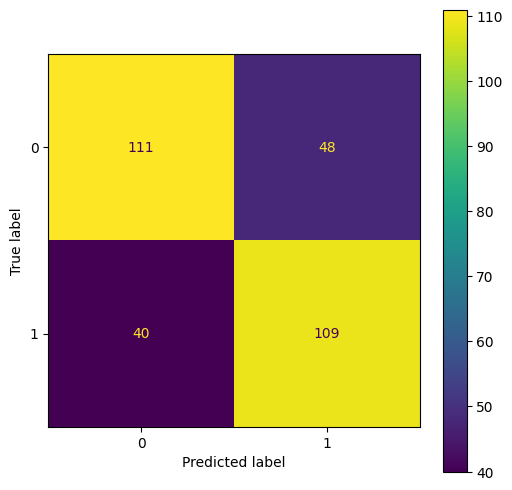

In [61]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax)
plt.show()

In [62]:
df_confusion_matrix = pd.DataFrame(conf_matrix, index=['0', '1'], columns=['Pred 0', 'Pred 1'])
df_confusion_matrix

,Pred 0,Pred 1
0,111,48
1,40,109


In [63]:
false_negative = df_confusion_matrix.loc['1', 'Pred 0']
false_positive = df_confusion_matrix.loc['0', 'Pred 1']
true_negative = df_confusion_matrix.loc['0', 'Pred 0']
true_postitive = df_confusion_matrix.loc['1', 'Pred 1']


print(f'True negatives: {true_negative}')
print(f'True positives: {true_postitive}')
print(f'False negatives: {false_negative}')
print(f'False positives: {false_positive}')

True negatives: 111
True positives: 109
False negatives: 40
False positives: 48


In [64]:
#print (f'Precision: {true_postitive/(true_postitive + false_positive):.2f}; Recall: {true_postitive/(true_postitive + false_negative):.2f}')

In [65]:
#print (f'Accuracy : {(true_postitive+true_negative)/(true_postitive+true_negative+false_negative+false_positive):.2f}')

In [66]:
precision = precision_score(y_test, knn_predict)
recall    = recall_score(y_test, knn_predict)
accuracy  = accuracy_score(y_test, knn_predict)
fscore    = f1_score(y_test, knn_predict)

print (f'Precision: {precision:.2f}, \
Recall: {recall:.2f}, Accuracy : {accuracy:.2f}, \
and F1 Score :{fscore:.2f}')

Precision: 0.69, Recall: 0.73, Accuracy : 0.71, and F1 Score :0.71


C:\Users\majal\AppData\Local\Temp\ipykernel_74064\751509764.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='Red')


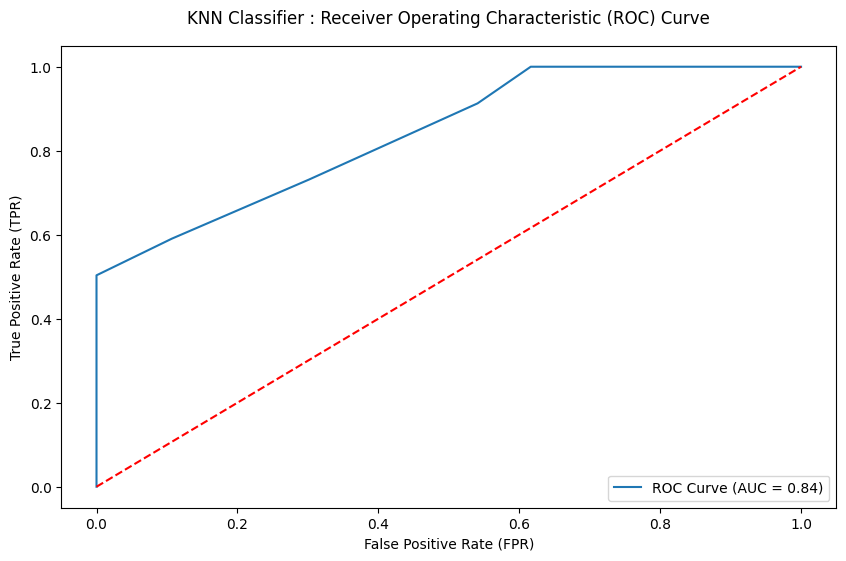

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score_yes = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_yes, pos_label=1)
roc_auc_val = roc_auc_score(y_test, y_score_yes)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='Red')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'KNN Classifier : Receiver Operating Characteristic (ROC) Curve',y=1.03)
plt.legend(loc='lower right')
plt.show()

<h3>Logistic Regression</h3>

In [68]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lr_model.fit(X_train,y_train)

c:\Users\majal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
lr_predict = lr_model.predict(X_test)

In [70]:
lr_proba = lr_model.predict_proba(X_test)[:,1]

In [71]:
conf_matrix = confusion_matrix(y_test, lr_predict)
conf_matrix

array([[121,  38],
       [ 20, 129]], dtype=int64)

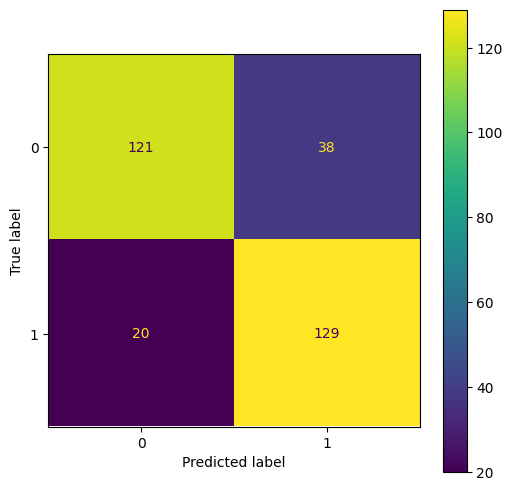

In [72]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax)
plt.show()

In [73]:
df_confusion_matrix = pd.DataFrame(conf_matrix, index=['0', '1'], columns=['Pred 0', 'Pred 1'])
df_confusion_matrix

,Pred 0,Pred 1
0,121,38
1,20,129


In [74]:
false_negative = df_confusion_matrix.loc['1', 'Pred 0']
false_positive = df_confusion_matrix.loc['0', 'Pred 1']
true_negative = df_confusion_matrix.loc['0', 'Pred 0']
true_postitive = df_confusion_matrix.loc['1', 'Pred 1']


print(f'True negatives: {true_negative}')
print(f'True positives: {true_postitive}')
print(f'False negatives: {false_negative}')
print(f'False positives: {false_positive}')

True negatives: 121
True positives: 129
False negatives: 20
False positives: 38


In [75]:
precision = precision_score(y_test, knn_predict)
recall    = recall_score(y_test, knn_predict)
accuracy  = accuracy_score(y_test, knn_predict)
fscore    = f1_score(y_test, knn_predict)

print (f'Precision: {precision:.2f}, \
Recall: {recall:.2f}, Accuracy : {accuracy:.2f}, \
and F1 Score :{fscore:.2f}')

Precision: 0.69, Recall: 0.73, Accuracy : 0.71, and F1 Score :0.71


C:\Users\majal\AppData\Local\Temp\ipykernel_74064\2224793109.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='Red')


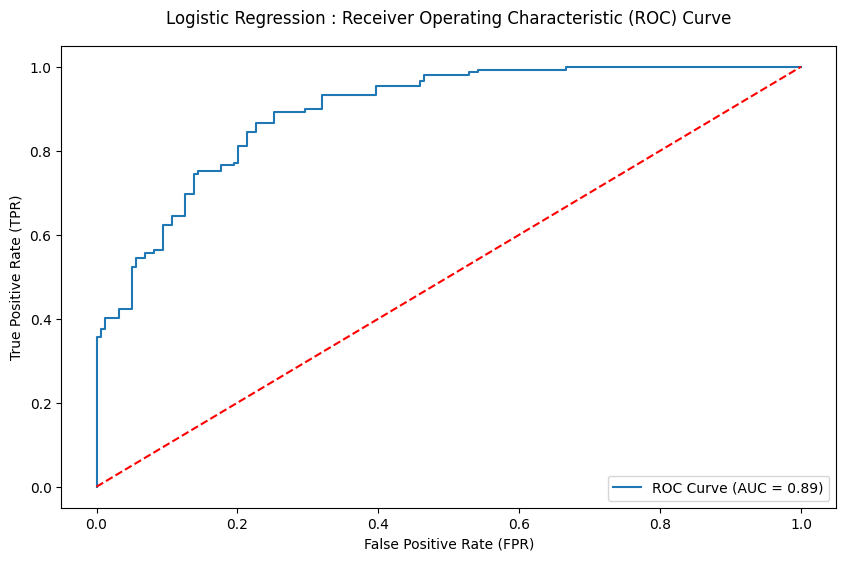

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score_yes = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_yes, pos_label=1)
roc_auc_val = roc_auc_score(y_test, y_score_yes)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='Red')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'Logistic Regression : Receiver Operating Characteristic (ROC) Curve',y=1.03)
plt.legend(loc='lower right')
plt.show()

<h3>Multinomial Naive Bayes</h3>

In [77]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       159
           1       0.69      0.70      0.69       149

    accuracy                           0.70       308
   macro avg       0.70      0.70      0.70       308
weighted avg       0.70      0.70      0.70       308

Confusion Matrix:
 [[112  47]
 [ 45 104]]


<h3> Gaussian Naive Bayes </h3>

In [79]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.814935064935065
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.81       159
           1       0.76      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
weighted avg       0.82      0.81      0.81       308

Confusion Matrix:
 [[118  41]
 [ 16 133]]
